**Exploratory data analysis**

In [1]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Charter'
rcParams['font.size'] = 12
rcParams['legend.fontsize'] = 12
rcParams['axes.labelpad'] = 12
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 12
rcParams['ytick.labelsize'] = 11
rcParams['xtick.labelsize'] = 11

In [2]:
cache = yaml.safe_load(open('data.yaml'))

# Popularity trend

In [3]:
popularity_dict = {ep: (cache[ep]['stats'], cache[ep]['month']) for ep in cache}
len(popularity_dict)

207

In [4]:
episode, values = zip(*sorted(popularity_dict.items(), key=lambda x: x[0]))

In [5]:
stats, month = zip(*values)

In [6]:
ticks = {}
value = None
for idx, el in enumerate(month):
    if not value or el != value:
        ticks[episode[idx]] = el
        value = el

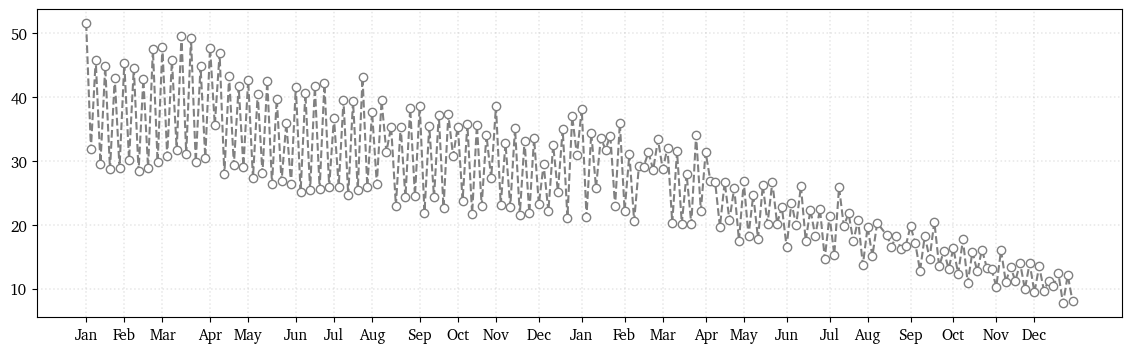

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(episode, stats, color='grey', ls='--', marker='o', ms=6, mfc='white')
plt.grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
_ = plt.xticks(ticks=list(ticks.keys()), labels=tuple(ticks.values()))

# Take 2022 for training / testing

In [8]:
year = 2022

In [9]:
popularity_dict = {ep: (cache[ep]['stats'], cache[ep]['month']) for ep in cache if cache[ep]['year'] == year}
len(popularity_dict)

104

In [10]:
result = {'Q-first': [], 'Q-second': [], 'Q-third': [], 'Q-forth': []}
for ep in sorted(cache):
    if cache[ep]['year'] == year:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            key = 'Q-first'
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            key = 'Q-second'
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            key = 'Q-third'
        else:
            key = 'Q-forth'
        #
        result[key].append(cache[ep]['stats'])

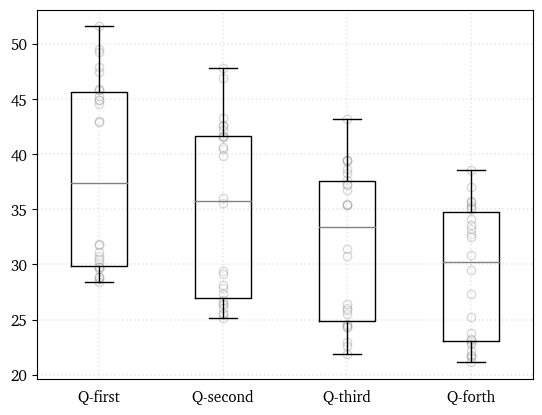

In [11]:
B = plt.boxplot(result.values(), medianprops={'color': 'grey'}, labels=result.keys())
plt.grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
plt.tick_params(axis='x', bottom=False)
#
for idx, q in enumerate(result):
    plt.scatter([idx+1]*len(result[q]), result[q], alpha=0.3, color='grey', facecolors='white')

In [12]:
popularity_thresholds = []
for idx, item in enumerate(B['whiskers']):
    if (idx + 1) % 2 == 0:
        popularity_thresholds.append(item.get_ydata()[0])
        
popularity_thresholds

[45.675, 41.7, 37.6, 34.775]

## Labeling

In [13]:
result_2022 = {}
for ep in sorted(cache):
    if cache[ep]['year'] == 2022:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            pt = 0
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            pt = 1
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            pt = 2
        else:
            pt = 3
        #
        label = 1 if cache[ep]['stats'] >= popularity_thresholds[pt] else 0
        result_2022[ep] = label

## Popularity by duration

In [14]:
result = {'Q-first': [[],[]], 'Q-second': [[],[]], 'Q-third': [[],[]], 'Q-forth': [[],[]]}
for ep in sorted(cache):
    if cache[ep]['year'] == 2022:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            key = 'Q-first'
            pt = 0
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            key = 'Q-second'
            pt = 1
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            key = 'Q-third'
            pt = 2
        else:
            key = 'Q-forth'
            pt = 3
        #
        idx = 1 if cache[ep]['stats'] >= popularity_thresholds[pt] else 0
        result[key][idx].append(cache[ep]['duration'])

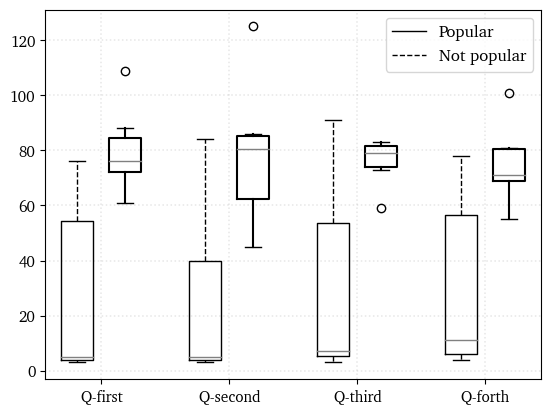

In [15]:
ticks = []
for idx, q in enumerate(result):
    pos = 1 + idx*2
    ticks.append(pos + 0.375)
    plt.boxplot(result[q][0], widths=0.5, positions=[pos], medianprops={'color': 'grey'}, whiskerprops={'ls': '--'})
    plt.boxplot(result[q][1], widths=0.5, positions=[pos + .75], medianprops={'color': 'grey'}, boxprops={'lw': 1.5}, whiskerprops={'lw': 1.5})
#
plt.grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
_ = plt.xticks(ticks=ticks, labels=result.keys())
_ = plt.legend(['Popular', 'Not popular'])

# What has changed in 2023?

In [16]:
year = 2023

In [17]:
popularity_dict = {ep: (cache[ep]['stats'], cache[ep]['month']) for ep in cache if cache[ep]['year'] == year}
len(popularity_dict)

103

In [18]:
result = {'Q-first': [], 'Q-second': [], 'Q-third': [], 'Q-forth': []}
for ep in sorted(cache):
    if cache[ep]['year'] == year:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            key = 'Q-first'
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            key = 'Q-second'
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            key = 'Q-third'
        else:
            key = 'Q-forth'
        #
        result[key].append(cache[ep]['stats'])

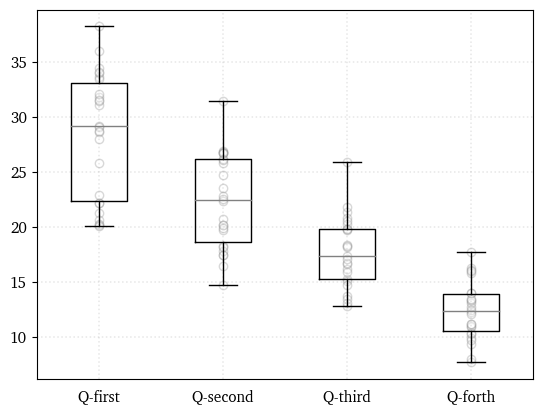

In [19]:
B = plt.boxplot(result.values(), medianprops={'color': 'grey'}, labels=result.keys())
plt.grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
plt.tick_params(axis='x', bottom=False)
#
for idx, q in enumerate(result):
    plt.scatter([idx+1]*len(result[q]), result[q], alpha=0.3, color='grey', facecolors='white')

In [20]:
popularity_thresholds = []
for idx, item in enumerate(B['whiskers']):
    if (idx + 1) % 2 == 0:
        popularity_thresholds.append(item.get_ydata()[0])
        
popularity_thresholds

[33.075, 26.175, 19.8, 13.875]

## Labeling

In [21]:
result_2023 = {}
for ep in sorted(cache):
    if cache[ep]['year'] == 2023:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            pt = 0
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            pt = 1
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            pt = 2
        else:
            pt = 3
        #
        label = 1 if cache[ep]['stats'] >= popularity_thresholds[pt] else 0
        result_2023[ep] = label

**Saving all labels for 2022 and 2023**

In [23]:
yaml.safe_dump(
    {2022: result_2022, 2023: result_2023},
    open('labels.yaml', 'w')
)

## Popularity by duration

In [24]:
result = {'Q-first': [[],[]], 'Q-second': [[],[]], 'Q-third': [[],[]], 'Q-forth': [[],[]]}
for ep in sorted(cache):
    if cache[ep]['year'] == 2023:
        if cache[ep]['month'] in ('Jan', 'Feb', 'Mar'):
            key = 'Q-first'
            pt = 0
        elif cache[ep]['month'] in ('Apr', 'May', 'Jun'):
            key = 'Q-second'
            pt = 1
        elif cache[ep]['month'] in ('Jul', 'Aug', 'Sep'):
            key = 'Q-third'
            pt = 2
        else:
            key = 'Q-forth'
            pt = 3
        #
        idx = 1 if cache[ep]['stats'] >= popularity_thresholds[pt] else 0
        result[key][idx].append(cache[ep]['duration'])

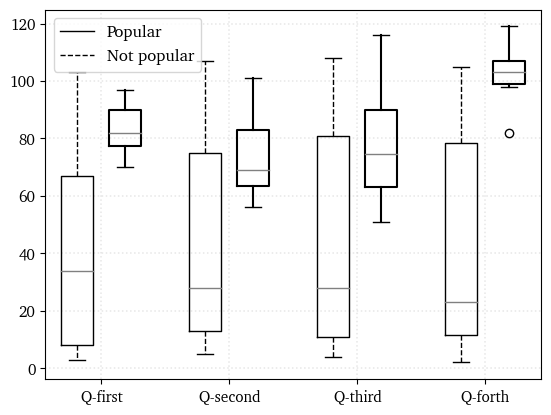

In [25]:
ticks = []
for idx, q in enumerate(result):
    pos = 1 + idx*2
    ticks.append(pos + 0.375)
    plt.boxplot(result[q][0], widths=0.5, positions=[pos], medianprops={'color': 'grey'}, whiskerprops={'ls': '--'})
    plt.boxplot(result[q][1], widths=0.5, positions=[pos + .75], medianprops={'color': 'grey'}, boxprops={'lw': 1.5}, whiskerprops={'lw': 1.5})
#
plt.grid(True, alpha=0.3, aa=True, ls=':', lw=1.1)
_ = plt.xticks(ticks=ticks, labels=result.keys())
_ = plt.legend(['Popular', 'Not popular'])